## Exploratory Component

In the explorartory part we will attempt to answer a few questions about cities using the same previous cities dataset. We will be investigating the following:
- Is the CO2 emmission of cities generally dependent on the cities themselves or are they dependent on the country where the city is located in.
- Based on various social/ economic parameters, is it possible to predict the location (coordinates) of the city.
- Invesstigate what effects the modesharing of a city.

To start we will look at modesharing in a city.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


 #### CO2 emmission of cities VS fossil fuel consumption of countries

In the prediction part of the project we attempted to merely predict the CO2 emmision per capita of a city. We are however curious about what impacts this CO2 emmission. We have found data which shows the total fossil fuel consumption per capita of every country over the last 50 years. We take the average of each country over the last three years and see if the highest fossil fuel consuming countries also have cities with high CO2 emmision. In other words we want to find out, is it the city itself which contributes to its own CO2 emission or is it the country which the city lies within which is contributing to how much the city emmites. We found the data for how much fossil fuel each country consumes per capita at the following link: https://ourworldindata.org/fossil-fuels.

In [5]:

fossil_fuels=pd.read_csv("fossil-fuels-per-capita.csv")
g = fossil_fuels[fossil_fuels['Year']>2015].groupby(fossil_fuels.Entity).mean()
consumption = list(g['Fossil fuels per capita (kWh)'])
column_names = ["Country", "Fossil fuel per capita (10MWh)"]

df = pd.DataFrame(columns=column_names) 
df['Country'] = fossil_fuels['Entity'].unique()
df['Fossil fuel per capita (10MWh)'] = list(np.array(consumption)*1e-4)
df = df.sort_values(by=['Fossil fuel per capita (10MWh)'], ascending=False).head(10)
df.head()

Country  Fossil fuel per capita (10MWh)
57                 Qatar                       20.039897
61             Singapore                       17.193791
72   Trinidad and Tobago                       14.475155
76  United Arab Emirates                       13.759359
39                Kuwait                       10.995292

In [6]:
df2 = pd.read_excel("FINAL-COMBINED-DATASET.xlsx")
df2 = df2[['City', 'CO2 Emissions per Capita (metric tonnes)']]
df2 = df2.sort_values(by=['CO2 Emissions per Capita (metric tonnes)'], ascending=False).head(10)
df2.head()

City  CO2 Emissions per Capita (metric tonnes)
36          Edmonton                                 44.100000
232            Ulsan                                 33.900000
310  New Orleans(LA)                                 32.400000
100     Cologne-Bonn                                 27.600000
153      Kuwait City                                 27.258964

<BarContainer object of 10 artists>

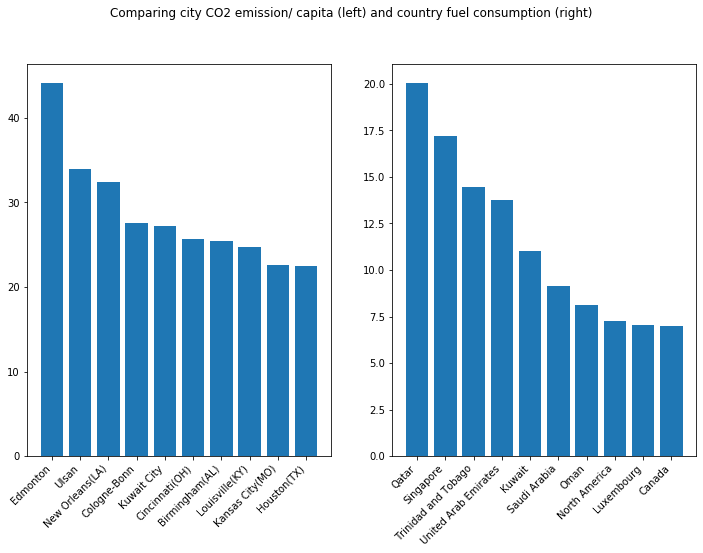

In [7]:
# plot both
# df = df.set_index('Country')
# df2 = df2.set_index('City')
x1 = df2['City']
y1 = df2['CO2 Emissions per Capita (metric tonnes)']
x2 = df['Country']
y2 = df['Fossil fuel per capita (10MWh)']
fig, axs = plt.subplots(1,2, figsize=(12,8))
fig.autofmt_xdate(rotation=45)
fig.suptitle('Comparing city CO2 emission/ capita (left) and country fuel consumption (right)')
axs[0].bar(x1, y1)
axs[1].bar(x2,y2)

The plot to the left are most polluting cities (CO2 emmission) per capita and on the right are the countries with the highest fossil fuel consuming countries per capita. There are a few of the highest polluting cities in the highest fuel consuming coutries which would indicate that there is a connection between the city and country. However if you look at the top four cities closly to see why they emmite so much CO2, you will find some interesting facts such as, Edmonton has some of the largest petrochemical and metal/ machinary industries in Canada. Ulsan is home to Korea's Hyundai motor manufacturing plant. New Orleans has some of the largest oil/ gas producers in the USA. Cologne-Bonn is one of euope's largest automotive industry. 

So when acessing the CO2 emission of a city, the largest parameter which impacts emission is probably the unique activites/ industries which are located in the city itself and not solely the country which the city is located in.

 #### Predicting city location

In this section we will attempt to find out if a cities coordinates impact various social parameters of a given city. We will also fit a model to some the social parameters and see if it is possible to predict with a certain accuracy the location of the city. We will start by finding the coordinates of all cities and then showing some parameter visualizations.

In [27]:
from geopy.geocoders import Nominatim
import seaborn as sns
from  matplotlib import pyplot
from matplotlib.pyplot import figure
from ast import literal_eval
import plotly.graph_objects as go

In [25]:
df = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 

# Function to get coordinates
def add_coordinates(city):
    """
    This functon will add long. / lat. coordinates as tuple for a city
    """

    if city != str:
        city = str(city)
    if city == "Baltimore(MD)":
        city = "Baltimore"
    if city == "Birmingham(AL)":
        city = "Birmingham"
    if city == "Valencia(VZL)":
        city = "Valencia"
    if city == "Tampa-St. Petersburg(FL)":
        city = "St. Petersburg, Florida"
    if city == "Denver-Aurora(CO)":
        city = "Aurora, Colorado"
    if city == "Minneapolis-St. Paul(MN)":
        city = "Saint Paul, MN"
    geolocator = Nominatim(user_agent="user_agent")
#     print(city)
    location = geolocator.geocode(city)
    lat_long = (location.latitude, location.longitude)
    return lat_long
    # print(location.address)
    
# df["coordinates"] = df["City"].apply(add_coordinates)   
# The function above takes a long time to run so we run it once 
# and save the full set with coordinates as a csv for fast loading later

df = pd.read_csv('location_from_pickle.csv') # Previous saved dataset  

Now that we have the coordinates for all cities. We will proceed to try with predicting location, to start with we will see if we can predict the distance a city is from the equator using some social and economic parameters. 

In [26]:
# Function to define distance in km from equater
def eq_dist(coord):
    # 1 degree is about 111.045 km
    dist = literal_eval(coord)[0]*111.045
    return int(abs(dist)) # Make distances south of equater positive.

df["eq_dist[km]"] = df["coordinates"].apply(eq_dist)
# Make sure everything looks ok.
df[['City', 'cityID', 'Country', 'coordinates', 'eq_dist[km]']].head()

City  cityID        Country                 coordinates  \
0  Baltimore(MD)   285.0  United States    (39.2908816, -76.610759)   
1      Melbourne    10.0      Australia  (-37.8142176, 144.9631608)   
2         Niamey   186.0          Niger       (13.524834, 2.109823)   
3          Hanoi   328.0        Vietnam   (21.0294498, 105.8544441)   
4         Urumqi    67.0          China      (43.419754, 87.319461)   

   eq_dist[km]  
0         4363  
1         4199  
2         1501  
3         2335  
4         4821

Before making any models, lets visualize a much discussed parameter for each city, namely GDP/ capita. 

In [29]:
# apply lat/ long to lists to further plot 
lat_list = []
long_list = []
for i in df['coordinates']:
    lat_list.append(literal_eval(i)[0])
    long_list.append(literal_eval(i)[1])
# long_list
z = df['GDP per Capita (USD)']

# Make plot
import chart_studio.plotly as py
import plotly.graph_objects as go

scatter = go.Scatter(x=np.array(long_list).flatten(),
                     y=np.array(lat_list).flatten(),
                     marker={'color': np.array(z).flatten(),
                             'showscale': True},
                     mode='markers')
fig = go.FigureWidget(data=[scatter],
                      layout={'xaxis': {'title': 'longitude'},
                              'yaxis': {'title': 'latitude'}})
go.Figure(fig)

From the plot above showing the coordinates ploted with intensity being GDP per capita, it looks like northern cities have a higher GDP (along with Oceania regions). This is somewhat expected but lets investigate this further and see if the relationship between location and along with other parameters can be modeled. 

In [31]:
# Start by choosing relevant features and normalizing them. 
features = ['Population Density (per sq. km)', 'Urbanization Rate 2015 (%)', 'GDP per Capita (USD)', 'Life Expectancy (years)']
X = df[features]
# X.isnull().sum()
X = X.fillna(X.mean())
X_n = (X-X.mean())/X.std()
y = df['eq_dist[km]']
X_n.shape

from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.33, random_state=123)
# define the keras model
model = Sequential()
model.add(Dense(500, input_dim=X_n.shape[1], activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='linear'))

# compile the keras model
model.compile(loss='mse', optimizer='adam')

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test))

# evaluate the keras model
pred = model.predict(X_test)

# evaluate predictions
print("\nMAE=%f" % mean_absolute_error(y_test, pred))
print("\nRMSE=%f" % np.sqrt(mean_squared_error(y_test, pred)))
print("r^2=%f" % r2_score(y_test, pred))



Train on 222 samples, validate on 110 samples
Epoch 1/100
222/222 [==============================] - 1s 2ms/step - loss: 15175926.2252 - val_loss: 13604297.0000
Epoch 2/100
222/222 [==============================] - 0s 54us/step - loss: 15171811.3153 - val_loss: 13600352.0909
Epoch 3/100
222/222 [==============================] - 0s 58us/step - loss: 15167362.7297 - val_loss: 13595812.9091
Epoch 4/100
222/222 [==============================] - 0s 58us/step - loss: 15161859.0000 - val_loss: 13590251.0000
Epoch 5/100
222/222 [==============================] - 0s 58us/step - loss: 15155104.2883 - val_loss: 13583399.4545
Epoch 6/100
222/222 [==============================] - 0s 54us/step - loss: 15146393.3874 - val_loss: 13575048.9091
Epoch 7/100
222/222 [==============================] - 0s 49us/step - loss: 15137754.2523 - val_loss: 13564860.4545
Epoch 8/100
222/222 [==============================] - 0s 49us/step - loss: 15126097.0631 - val_loss: 13552543.4545
Epoch 9/100
222/222 [=====

222/222 [==============================] - 0s 49us/step - loss: 3285126.5360 - val_loss: 3152365.4091
Epoch 70/100
222/222 [==============================] - 0s 54us/step - loss: 3174306.8401 - val_loss: 3114962.3636
Epoch 71/100
222/222 [==============================] - 0s 58us/step - loss: 3104331.9707 - val_loss: 3080847.1364
Epoch 72/100
222/222 [==============================] - 0s 49us/step - loss: 3072636.3604 - val_loss: 3048114.5455
Epoch 73/100
222/222 [==============================] - 0s 49us/step - loss: 2963589.3423 - val_loss: 3017883.7045
Epoch 74/100
222/222 [==============================] - 0s 54us/step - loss: 3056093.2860 - val_loss: 2990114.3864
Epoch 75/100
222/222 [==============================] - 0s 54us/step - loss: 2931491.0541 - val_loss: 2963668.2273
Epoch 76/100
222/222 [==============================] - 0s 49us/step - loss: 2770199.8964 - val_loss: 2936692.0227
Epoch 77/100
222/222 [==============================] - 0s 49us/step - loss: 2941191.0450 - v

Mean absolute error (MAE) for our model is  about 1140 km which is about 10.4 degrees when it is evaluated on the test set (1/3 of total dataset). That means that given the 4 features used ('Population Density (per sq. km)', 'Urbanization Rate 2015 (%)', 'GDP per Capita (USD)', 'Life Expectancy (years)') we are able to predict the distance the city is from the equater within an error of 10.4 degrees! This is quite a small distance, see the map figure below for reference, the horizontal lines are spaced 15 degrees apart. 

![alt text](map_lines.gif "World latitude and longitude map")

So now that we have seen that we can model the distance from the equator, lets take a step further and try to model the real coordinates of cities (latitude/ longitude). We will also try doing classification of the country regions, i.e. predict which continent the city is located. This time we will try to further analize the features which are used in the prediction model. 

In [44]:
# Again start by loading dataset with pre-calcualated city coordinates
df = pd.read_csv('location_from_pickle.csv')
df.describe()

Unnamed: 0      cityID   clusterID  Car Modeshare (%)  \
count  332.000000  332.000000  332.000000         268.000000   
mean   165.500000  165.801205    5.578313          45.611819   
std     95.984374   95.619666    3.591263          27.787198   
min      0.000000    1.000000    1.000000           0.000000   
25%     82.750000   83.750000    2.000000          21.525000   
50%    165.500000  165.500000    6.000000          38.000000   
75%    248.250000  248.250000    8.000000          68.775000   
max    331.000000  331.000000   12.000000          94.800000   

       Public Transit Modeshare (%)  Walking Modeshare (%)  \
count                    269.000000             255.000000   
mean                      28.133913              17.510196   
std                       20.310731              14.842958   
min                        0.400000               0.000000   
25%                       11.000000               3.200000   
50%                       28.000000              17.000000   
75%                       42.000000              26.200000   
max                       82.500000              78.000000   

       Gasoline Pump Price (USD/liter)  Road Deaths Rate (per 1000)  \
count                       332.000000                   331.000000   
mean                          1.056024                    14.674622   
std                           0.425800                     8.726269   
min                           0.010000                     0.600000   
25%                           0.707500                     7.500000   
50%                           1.055000                    13.900000   
75%                           1.322500                    20.400000   
max                           2.120000                    37.200000   

       Subway Length (km)  Subway Length Density (per km)  ...  \
count          332.000000                      332.000000  ...   
mean            39.041416                        0.038099  ...   
std             77.236480                        0.068863  ...   
min              0.000000                        0.000000  ...   
25%              0.000000                        0.000000  ...   
50%              0.000000                        0.000000  ...   
75%             42.825000                        0.053334  ...   
max            588.000000                        0.612982  ...   

       BikeShare Propensity Factor  Development Factor  Sustainability Factor  \
count                   332.000000          332.000000             332.000000   
mean                      0.398885            0.417877               0.382575   
std                       0.078519            0.266415               0.153237   
min                       0.000000            0.000000               0.000000   
25%                       0.358622            0.215262               0.281454   
50%                       0.390940            0.342730               0.341291   
75%                       0.423659            0.707410               0.451648   
max                       1.000000            1.000000               1.000000   

       Population Factor  Congestion Factor  Sprawl Factor  \
count         332.000000         332.000000     332.000000   
mean            0.171293           0.491230       0.492131   
std             0.159287           0.189169       0.227305   
min             0.000000           0.000000       0.000000   
25%             0.055493           0.364674       0.308533   
50%             0.119005           0.533161       0.469138   
75%             0.248133           0.640700       0.679300   
max             1.000000           1.000000       1.000000   

       Network Density Factor  AvgTemperature  Temperature    Humidity  
count              332.000000      111.000000   332.000000  332.000000  
mean                 0.412452       56.055856     8.618614   74.870482  
std                  0.151724       23.389997    11.769086   20.120290  
min                  0.000000      -99.000000   -24.900

Above you can see the main statistical features for each column. The dataset consists of 332 cities as it is right now. Since I saved the coordinates in a formatted string in a single column in the dataframe, first I parse them into two different **float** columns, namely: 'Latitude' and 'Longitude'.

In [45]:
regions = pd.read_csv('country_region.csv')[['Country','Region']]
df = pd.merge(df, regions, on='Country', how='inner')

def get_lat(x):
    return float(x.split(',')[0][1:])
def get_lon(x):
    return float(x.split(',')[1][:-1])

df = df[~df['Location'].isnull()] # To make sure that there's no null values amongst that geopy returned.

df['Latitude'] = df['Location'].apply(get_lat)
df['Longitude'] = df['Location'].apply(get_lon)
df[['Region', 'Latitude', 'Longitude']].head(3)

Region   Latitude  Longitude
0  North America  39.290882 -76.610759
1  North America  43.034993 -87.922497
2  North America  30.271129 -97.743700

In [46]:
from sklearn.preprocessing import LabelEncoder

def multi_label_encoder(df, cols2code):
        encoder = LabelEncoder()
        for col in cols2code:
            df[col+'(Encoded)'] = encoder.fit_transform(df[col])
        return df
    
df = multi_label_encoder(df, ['Region', 'Country'])
df.head()

Unnamed: 0           City  cityID  clusterID         Typology  \
0           0  Baltimore(MD)   285.0        7.0      Auto Sprawl   
1           5  Milwaukee(WI)   297.0        7.0      Auto Sprawl   
2          13     Austin(TX)   301.0        7.0      Auto Sprawl   
3          18    Chicago(IL)   269.0        8.0  Auto Innovative   
4          40    Atlanta(GA)   273.0        8.0  Auto Innovative   

         Country  Car Modeshare (%)  Public Transit Modeshare (%)  \
0  United States               85.0                           6.1   
1  United States               88.6                           3.6   
2  United States               86.8                           2.6   
3  United States               78.0                          12.0   
4  United States               86.8                           3.1   

  Bicycle Modeshare (%)  Walking Modeshare (%)  ...  AvgTemperature  \
0                   0.3                    2.6  ...             NaN   
1                   0.5                    2.7  ...             NaN   
2                   0.8                    1.8  ...             NaN   
3                   0.7                    3.1  ...             NaN   
4                   0.3                    1.3  ...             NaN   

                 coordinates  Temperature  Humidity  \
0   (39.2908816, -76.610759)         7.34        82   
1   (43.0349931, -87.922497)        -9.69        54   
2  (30.2711286, -97.7436995)        -1.02        34   
3  (41.8755616, -87.6244212)        -8.07        63   
4  (33.6238152, -84.1693827)         2.43        74   

                    Location         Region   Latitude  Longitude  \
0   (39.2908816, -76.610759)  North America  39.290882 -76.610759   
1   (43.0349931, -87.922497)  North America  43.034993 -87.922497   
2  (30.2711286, -97.7436995)  North America  30.271129 -97.743700   
3  (41.8755616, -87.6244212)  North America  41.875562 -87.624421   
4  (33.6238152, -84.1693827)  North America  33.623815 -84.169383   

   Region(Encoded)  Country(Encoded)  
0                5               105  
1                5               105  
2                5               105  
3                5               105  
4                5               105  

[5 rows x 89 columns]

Now, the dataset is ready to be investigated. First things first, we perform a percentage based check to see which columns are missing and how many values compared to the total number of rows in the dataset. If particular columns are missing relatively too large number of values, it's better to consider dropping the feature them instead of trying to impute the values. Below the top five features are shown, the missing values is shown in procent of total missing for the feature. If a feature is missing more than 25% of its values it is deemed not reliable and therfor dropped. 

In [47]:
temp_df = pd.DataFrame(df.isnull().sum(axis=0), columns=['Missing Values'])/df.count()[0]*100 
temp_df = temp_df.sort_values(by=temp_df.columns[0], ascending=False)
pd.set_option('display.max_rows', 1000)
print(temp_df.head(5))

# Drop features
cols2drop = temp_df[temp_df['Missing Values']>=25].index
df = df.drop(cols2drop, axis=1).drop('Unnamed: 0', axis=1).drop('coordinates', axis=1)
df.head(3)

                        Missing Values
AvgTemperature               67.441860
Traffic Index                55.149502
Inefficiency Index           55.149502
Travel Time Index            55.149502
Congestion PM Peak (%)       47.840532


City  cityID  clusterID     Typology        Country  \
0  Baltimore(MD)   285.0        7.0  Auto Sprawl  United States   
1  Milwaukee(WI)   297.0        7.0  Auto Sprawl  United States   
2     Austin(TX)   301.0        7.0  Auto Sprawl  United States   

   Car Modeshare (%)  Public Transit Modeshare (%)  Walking Modeshare (%)  \
0               85.0                           6.1                    2.6   
1               88.6                           3.6                    2.7   
2               86.8                           2.6                    1.8   

   Gasoline Pump Price (USD/liter)  Road Deaths Rate (per 1000)  ...  \
0                             0.66                          8.5  ...   
1                             0.64                          9.8  ...   
2                             0.60                         12.8  ...   

   Sprawl Factor  Network Density Factor  Temperature  Humidity  \
0       0.722163                0.425187         7.34        82   
1       0.680911                0.582846        -9.69        54   
2       0.765455                0.379809        -1.02        34   

                    Location         Region   Latitude  Longitude  \
0   (39.2908816, -76.610759)  North America  39.290882 -76.610759   
1   (43.0349931, -87.922497)  North America  43.034993 -87.922497   
2  (30.2711286, -97.7436995)  North America  30.271129 -97.743700   

   Region(Encoded)  Country(Encoded)  
0                5               105  
1                5               105  
2                5               105  

[3 rows x 68 columns]

Now that all viable features are left in our dataframe we will perform feature selection and select the most useful features to be used in the model.

Instead of trying to impute values for the remaining columns we will check the correlation, first correlation check between the coordinates and the Latitude/Longitude values - as a smart way of feature selection. The absolute value of correlation is used because the important aspect is the magnitude of the correlation to explain a change in a variable compared to another one.

In [48]:
# Correlation with latitude
pd.set_option('display.max_rows', 1000)
corr_Lat = abs(pd.DataFrame(df.corr()['Latitude'])).sort_values(by='Latitude', ascending=False)
corr_Lat.head(10)

Latitude
Latitude                                  1.000000
Temperature                               0.669497
clusterID                                 0.496319
Road Deaths Rate (per 1000)               0.494275
Life Expectancy (years)                   0.460763
GDP per Capita (USD)                      0.458740
Digital Penetration                       0.458065
Development Factor                        0.433200
Internet Penetration                      0.404412
CO2 Emissions per Capita (metric tonnes)  0.399059

In [49]:
# Correlation with longitude
pd.set_option('display.max_rows', 1000)
corr_Lon = abs(pd.DataFrame(df.corr()['Longitude'])).sort_values(by='Longitude', ascending=False)
corr_Lon.head(10)

Longitude
Longitude                                   1.000000
Region(Encoded)                             0.686697
Car Modeshare (%)                           0.538104
Urbanization Rate Change 2015 – 2025 (pp)   0.525583
Urbanization Rate 2015 (%)                  0.437028
Sustainability Factor                       0.433833
Congestion Factor                           0.430325
Population Factor                           0.429835
Walking Modeshare (%)                       0.389066
Development Factor                          0.380073

Interestingly, if you see the index of the outputs above, the features that the latitude and longitude values depend on the highest are completely different. Lattitude being correlated to the average temperature on 30th of November is quite logical. However, the other features do not represent a direct relation to both longitude and latitude.

Since there is no distinct features for both latitude and longitude, three of the features correlated to each will selected for the model. We will now attempt to perform continent classification of the cities. 

In [50]:
df_reg = df[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)', \
         'Region(Encoded)']].dropna()
X = df_reg[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'Digital Penetration', 'Car Modeshare (%)', 'Life Expectancy (years)']].values
y = df_reg['Region(Encoded)'].values
X_norm = (X - np.mean(X))/np.std(X) # Normalize values so we get better results!
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 600, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 

rf = RandomForestClassifier()
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   36.4s finished


0.8688524590163934

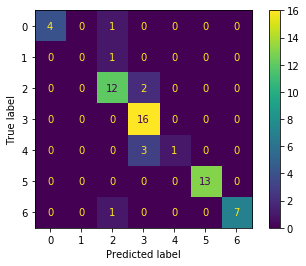

In [52]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

Three fold cross validation has been used to evaluate the continent classification, as seen above the classification model was able to classify the cities continent quite well, acheiving about 87% accuracy when evaluated.

Now we will move on to the most challenging part, namely predicting the latidtude/ longitude coordinates of cities. To do this a multilayer feed-forward neural network will be used. 

By seeing the correlation results above, we decided to use 6 features in total:
* 3 features that are correlated to Latitude the most (which are not directly related with geography).
* 3 features that are correlated to Longitude the most (which are not directly related with geography).

The chosen features are: Road Deaths Rate (per 1000), Digital Penetration, Life Expectancy (years), Car Modeshare (%), Urbanization Rate Change 2015 – 2025 (pp), Congestion Factor. 

In [53]:
df_nn = df[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'GDP per Capita (USD)', 'Car Modeshare (%)', 'Life Expectancy (years)', \
         'Latitude', 'Longitude']].dropna()

X = df_nn[['Road Deaths Rate (per 1000)','Urbanization Rate Change 2015 – 2025 (pp)', 'Congestion Factor',\
         'GDP per Capita (USD)', 'Car Modeshare (%)', 'Life Expectancy (years)']].values

y = df_nn[['Latitude', 'Longitude']].values

X_norm = (X - np.mean(X))/np.std(X) # Normalize values so we get better results!

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# define the keras model
model = Sequential()
model.add(Dense(128, input_dim=np.shape(X_train)[1], activation='relu'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(2, activation='linear')) # Output layer.


# compile the keras model
opt = Adam(learning_rate=1e-2)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=150, batch_size=64, verbose=1, validation_split=0.25) # Do not print the progress since 3500 epochs.

Train on 127 samples, validate on 43 samples
Epoch 1/150
127/127 [==============================] - 0s 1ms/step - loss: 3754.4558 - mean_squared_error: 3754.4558 - val_loss: 2849.2747 - val_mean_squared_error: 2849.2747
Epoch 2/150
127/127 [==============================] - 0s 55us/step - loss: 3553.8931 - mean_squared_error: 3553.8933 - val_loss: 2741.9998 - val_mean_squared_error: 2741.9998
Epoch 3/150
127/127 [==============================] - 0s 39us/step - loss: 3408.4996 - mean_squared_error: 3408.4995 - val_loss: 2668.1365 - val_mean_squared_error: 2668.1365
Epoch 4/150
127/127 [==============================] - 0s 47us/step - loss: 3298.5138 - mean_squared_error: 3298.5137 - val_loss: 2604.8672 - val_mean_squared_error: 2604.8672
Epoch 5/150
127/127 [==============================] - 0s 47us/step - loss: 3183.7068 - mean_squared_error: 3183.7068 - val_loss: 2542.9495 - val_mean_squared_error: 2542.9495
Epoch 6/150
127/127 [==============================] - 0s 55us/step - loss: 

127/127 [==============================] - 0s 39us/step - loss: 2213.5204 - mean_squared_error: 2213.5205 - val_loss: 2487.1316 - val_mean_squared_error: 2487.1316
Epoch 48/150
127/127 [==============================] - 0s 39us/step - loss: 2213.4746 - mean_squared_error: 2213.4746 - val_loss: 2508.1204 - val_mean_squared_error: 2508.1204
Epoch 49/150
127/127 [==============================] - 0s 55us/step - loss: 2227.4094 - mean_squared_error: 2227.4094 - val_loss: 2475.5547 - val_mean_squared_error: 2475.5547
Epoch 50/150
127/127 [==============================] - 0s 39us/step - loss: 2219.7595 - mean_squared_error: 2219.7593 - val_loss: 2448.8188 - val_mean_squared_error: 2448.8188
Epoch 51/150
127/127 [==============================] - 0s 47us/step - loss: 2229.6317 - mean_squared_error: 2229.6316 - val_loss: 2466.5701 - val_mean_squared_error: 2466.5701
Epoch 52/150
127/127 [==============================] - 0s 39us/step - loss: 2193.8483 - mean_squared_error: 2193.8484 - val_los

127/127 [==============================] - 0s 39us/step - loss: 2156.8914 - mean_squared_error: 2156.8914 - val_loss: 2467.0046 - val_mean_squared_error: 2467.0046
Epoch 94/150
127/127 [==============================] - 0s 55us/step - loss: 2157.8331 - mean_squared_error: 2157.8333 - val_loss: 2463.9001 - val_mean_squared_error: 2463.9001
Epoch 95/150
127/127 [==============================] - 0s 39us/step - loss: 2155.7198 - mean_squared_error: 2155.7197 - val_loss: 2467.0696 - val_mean_squared_error: 2467.0696
Epoch 96/150
127/127 [==============================] - 0s 39us/step - loss: 2154.0555 - mean_squared_error: 2154.0557 - val_loss: 2472.3252 - val_mean_squared_error: 2472.3252
Epoch 97/150
127/127 [==============================] - 0s 39us/step - loss: 2153.9674 - mean_squared_error: 2153.9675 - val_loss: 2483.2473 - val_mean_squared_error: 2483.2473
Epoch 98/150
127/127 [==============================] - 0s 39us/step - loss: 2154.8869 - mean_squared_error: 2154.8867 - val_los

127/127 [==============================] - 0s 39us/step - loss: 2125.7179 - mean_squared_error: 2125.7180 - val_loss: 2493.7239 - val_mean_squared_error: 2493.7239
Epoch 140/150
127/127 [==============================] - 0s 39us/step - loss: 2125.9440 - mean_squared_error: 2125.9438 - val_loss: 2497.0688 - val_mean_squared_error: 2497.0688
Epoch 141/150
127/127 [==============================] - 0s 39us/step - loss: 2119.0074 - mean_squared_error: 2119.0073 - val_loss: 2495.7373 - val_mean_squared_error: 2495.7373
Epoch 142/150
127/127 [==============================] - 0s 31us/step - loss: 2121.7130 - mean_squared_error: 2121.7131 - val_loss: 2498.4954 - val_mean_squared_error: 2498.4954
Epoch 143/150
127/127 [==============================] - 0s 39us/step - loss: 2118.3991 - mean_squared_error: 2118.3992 - val_loss: 2496.4197 - val_mean_squared_error: 2496.4197
Epoch 144/150
127/127 [==============================] - 0s 39us/step - loss: 2120.2716 - mean_squared_error: 2120.2717 - va

In [55]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

41.04008580929114

The error above is the mean euclidean distance between the predicted coordinates and the true coordinates. Since we are dealing with a 2-D plane, it coul be nice if we could visualize this, lets do that below.

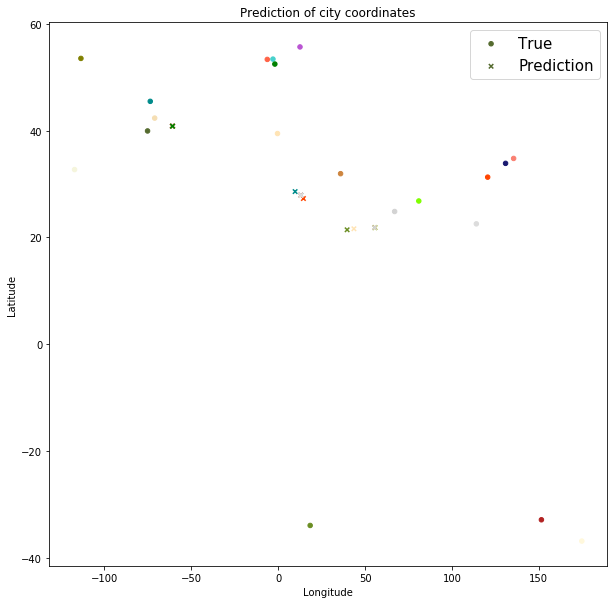

In [57]:
import matplotlib.colors as mcolors
import random

pred = pd.DataFrame(y_pred, columns=['Latitude', 'Longitude'])
true = pd.DataFrame(y_test, columns=['Latitude', 'Longitude'])

# Too much info when all preditcitons are plotted, just plot k of them
k = 20
pred_k = pred[:k]
true_k = true[:k]

color_dict = mcolors.CSS4_COLORS
color_list = list(color_dict.keys())
colors = random.sample(color_list, k=k) # pick the k nr. colors needed at random

# plot
fig, ax = plt.subplots(figsize=(10,10))
true_k.plot.scatter(x='Longitude', y='Latitude', marker='o', color=colors, ax=ax, label='True')
pred_k.plot.scatter(x='Longitude', y='Latitude', marker='x', color=colors, ax=ax, label='Prediction')
plt.title('Prediction of city coordinates')
ax.legend(prop={'size': 15})

The plot above gives good intuition of how our model behaves. The model is able to predict the coordinats very well for most cities that have a latitude greater than about 20 (above the equator). However for cities which lie below the equator or outlier cities, the model has difficulties predicting the coordinates. 